Dataset Schema:
root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)

First 5 rows of the dataset:
+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows

Summary Statistics:
+-------+------------------+-------------------+------------------+------------------+
|summary|      sepal_length|        sepal_width|      petal_leng

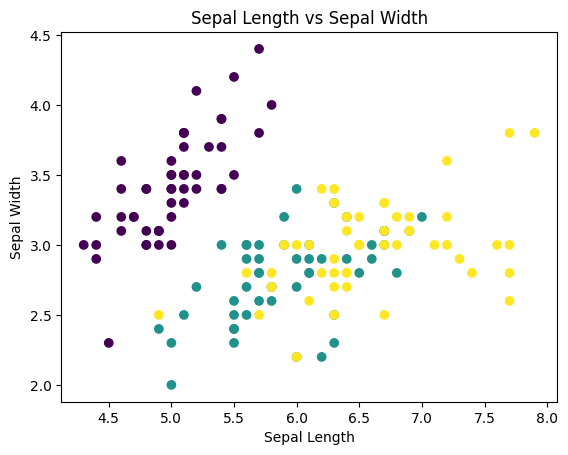

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Iris Dataset Exploration") \
    .getOrCreate()

# Load the iris dataset from a CSV file
irisData = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load("iris.csv")

# Print the schema of the dataset
print("Dataset Schema:")
irisData.printSchema()

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
irisData.show(5)

# Calculate summary statistics of numeric columns
print("Summary Statistics:")
irisData.select("sepal_length", "sepal_width", "petal_length", "petal_width") \
    .summary("count", "mean", "stddev", "min", "max") \
    .show()

# Count the number of records in each species category
print("Number of records by species:")
irisData.groupBy("species").count().show()

# Perform data visualization (requires additional libraries like Matplotlib or Seaborn)
# Here's a simple example using the sepal length and width columns
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas for visualization
iris_pd = irisData.select("sepal_length", "sepal_width", "species").toPandas()

# Map species categories to numeric values
species_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
iris_pd["species_numeric"] = iris_pd["species"].map(species_mapping)

# Scatter plot of sepal length vs sepal width colored by species
plt.scatter(iris_pd["sepal_length"], iris_pd["sepal_width"], c=iris_pd["species_numeric"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.show()

# Stop the SparkSession
spark.stop()
